# Lecture 3 Sector-coupling

## PV, CHP, Bio, Natural-gas, District heating

### 1)Import Packages

In [3]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

In [4]:
#os.chdir("C:\\Users\\82103\\Documents\\Market Integration and Sector Coupling\\pypsa\\exercise_0126")
excel_file_path = "C:\\Users\\SAHITHYA\\OneDrive\\Desktop\\BTU\\Market integration of renewable energies\\=PYPSA Project\\data_Germany.xlsx"

### 2)Create a network and set Snapshots

In [5]:
# Create a new PyPSA network
network= pypsa.Network()
network.set_snapshots(range(8760))  # Solve for a year 365*24
solver='glpk'

### 3)Add Buses

In [6]:
# Read excel file which contains Non renewable generators data

bus_data = pd.read_excel(excel_file_path, sheet_name='buses')


In [7]:
for index,row in bus_data.iterrows():
    network.add(
    "Bus",
    name=row['bus'],
    v_nom=row['v_nom'],
    carrier=row['carrier'],
    #x=row['x'],
    #y=row['y']
)
    
network.buses

attribute,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
50Hertz,380.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
Amprion,380.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
Tennet,380.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,
TransnetBW,380.0,,0.0,0.0,AC,,1.0,0.0,inf,PQ,,


### 4)Add generators

In [8]:

generators = pd.read_excel(excel_file_path,sheet_name="generators" )

network.madd(
"Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.carrier),
    p_nom=list(generators.p_nom),
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
    efficiency=list(generators.efficiency)
    ) 

network.generators

,bus,carrier,p_nom,p_nom_extendable,marginal_cost,efficiency,control,type,p_nom_mod,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,q_set,sign,marginal_cost_quadratic,build_year,lifetime,capital_cost,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50_Biomasse,50Hertz,biomass,1910.0,True,74.520,0.4,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Coal,50Hertz,coal,3234.0,False,33.708,0.3,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Lignite,50Hertz,lignite,9762.0,False,31.960,0.4,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Natural gas,50Hertz,gas,5738.0,True,36.568,0.4,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Offshore Wind,50Hertz,wind,1068.0,True,0.000,1.0,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Onshore Wind,50Hertz,wind,18809.0,True,0.000,1.0,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Pumped storage,50Hertz,hydro,2793.0,True,5.000,1.0,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
50_Solar,50Hertz,solar,12705.0,True,0.000,1.0,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
A_Biomasse,Amprion,biomass,1507.0,True,74.520,0.4,PQ,,0.0,0.0,inf,0.0,1.0,0.0,0.0,1.0,0.0,0,inf,0.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [9]:
PV_timeseries=pd.read_excel(excel_file_path,sheet_name='PV_timeseries')
wind_timeseries=pd.read_excel(excel_file_path,sheet_name='wind_timeseries')

In [10]:
network.generators_t.p_max_pu["50_Solar"] = list(PV_timeseries.p_nom_pu_solar_50Hertz)
network.generators_t.p_max_pu["50_Offshore Wind	"] = list(wind_timeseries.p_nom_pu_offshore_50Hertz)
network.generators_t.p_max_pu["50_Onshore Wind"] = list(wind_timeseries.p_nom_pu_onshore_50Hertz)

network.generators_t.p_max_pu["A_Solar"] = list(PV_timeseries.p_nom_pu_solar_Amprion)
network.generators_t.p_max_pu["A_Onshore Wind"] = list(wind_timeseries.p_nom_pu_Amprion)

network.generators_t.p_max_pu["TBW_Solar"] = list(PV_timeseries.p_nom_pu_solar_TransnetBW)
network.generators_t.p_max_pu["TBW_Onshore Wind"] = list(wind_timeseries.p_nom_pu_TransnetBW)

network.generators_t.p_max_pu["Ten_Solar"] = list(PV_timeseries.p_nom_pu_solar_Tennet)
network.generators_t.p_max_pu["Ten_Offshore Wind"] = list(wind_timeseries.p_nom_pu_offshore_Tennet)
network.generators_t.p_max_pu["Ten_Onshore Wind"] = list(wind_timeseries.p_nom_pu_onshore_Tennet)

### 5)Add load

### Added by Parag

#################################################################################################################################################################

You can add your all loads in a timeseries in columns and add load using network.add function like mentioned in the following code:

To verify whether the timeseries of the load data (p_set) is added properly, use:  `network.loads_t.p_set`  this command

In [11]:
# Read excel file which contains Non renewable generators data
def add_consumers(filename, index_col):
    try:
        load = pd.read_(filename,index_col=index_col)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return

    for load_name in list(load.columns.unique()):
        network.add("Load",
        f"{load_name}",
        bus=load_name,
        p_set=load[load_name].tolist()
        )

    return network.loads_t.p_set.head(5)    

#################################################################################################################################################################

In [13]:

demand = pd.read_excel(excel_file_path,sheet_name="load_hourly" )
network.add("Load", "Amprion", bus="Amprion", p_set=demand["Amprion"])
network.add("Load", "Tennet", bus="Tennet", p_set=demand["TenneT"])
network.add("Load", "TransnetBW", bus="TransnetBW", p_set=demand["TransnetBW"])
network.add("Load", "50Hertz", bus="50Hertz", p_set=demand["50Hertz"])



<AxesSubplot: xlabel='snapshot', ylabel='MW'>

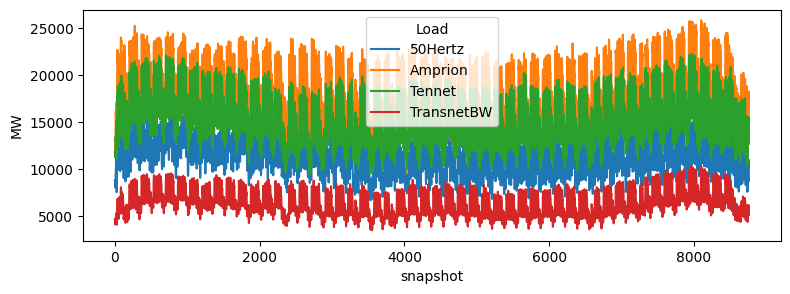

In [16]:
network.loads_t.p_set.plot(figsize=(9,3), ylabel="MW")

### 6)Add links

In [17]:
def add_links(filename, header):
    try:
        links = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index, row in links.iterrows():
        network.add(
            "Link",
            name=row['name'],
            bus0=row['bus0'],
            bus1=row['bus1'],
            #bus2=row['bus2'],
            p_nom=row['p_nom'],
            p_nom_extendable=row['p_nom_extendable'],
            efficiency=row['efficiency'],
            #efficiency2=row['efficiency2'],
            capital_cost=row['capital_cost']
        )
    return network.links

In [18]:
add_links('links.csv',0)

FileNotFoundError: [Errno 2] No such file or directory: 'links.csv'

### 7)Add carriers

In [21]:
Carriers = pd.read_excel(excel_file_path,sheet_name="co2_emissions" )
Carriers.head()


,generator,co2_emission
0,Coal,0.354
1,Gas,0.202
2,solarPV_rooftop,0.000
3,solarPV_utility,0.000
4,wind_offshore,0.000


In [22]:
Carriers.columns = Carriers.columns.str.strip()

# Then, proceed with your iteration
for index, row in Carriers.iterrows():
    network.add(
        "Carrier",
        name=row['generator'],
        co2_emissions=row['co2_emission'],
        nice_name=row['generator']
    )


In [23]:
network.carriers

attribute,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
Coal,0.354,,Coal,inf,0.0
Gas,0.202,,Gas,inf,0.0
solarPV_rooftop,0.000,,solarPV_rooftop,inf,0.0
solarPV_utility,0.000,,solarPV_utility,inf,0.0
wind_offshore,0.000,,wind_offshore,inf,0.0
wind_onshore,0.000,,wind_onshore,inf,0.0


### 8)Storages

def add_stores(filename, header):
    try:
        stores = pd.read_csv(filename, header=header)
    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
        return
        
    for index, row in stores.iterrows():
        network.add(
            "Store",
            name=row['name'],
            e_initial=row['e_initial'],
            e_nom=row['e_nom'],
            marginal_cost=row['marginal_cost'],
            bus=row['bus'],
            e_cyclic=row['e_cyclic'],
            e_nom_extendable=row['e_nom_extendable'],
        )
    return network.stores

add_stores('stores.csv',0)

### 9)Global constraints

In [24]:
network.add("GlobalConstraint", "co2_limit", sense="<=", constant=0.0)

In [25]:
network.lopf()

C:\Users\SAHITHYA\AppData\Local\Temp\ipykernel_35060\889609669.py:1: DeprecatedWarning: lopf is deprecated as of 0.24 and will be removed in 1.0. Use linopy-based function ``n.optimize()`` instead. Migrate extra functionalities: https://pypsa.readthedocs.io/en/latest/examples/optimization-with-linopy-migrate-extra-functionalities.html.
  network.lopf()
INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 4.84s
INFO:pypsa.linopf:Solve linear problem using Glpk solver


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
# Your DataFrame df
df = pd.concat(
    [
        network.generators_t.p.loc[0],
        network.links_t.p0.loc[0],
        network.loads_t.p.loc[0],
    ],
    keys=["Generators", "Links", "Line"],
    names=["Component", "index"],
).reset_index(name="Production")

# Plotting using PyPSA
fig, ax = plt.subplots(figsize=(13, 7))

# Plot generators
df_generators = df[df["Component"] == "Generators"]
ax.bar(df_generators["index"], df_generators["Production"], label="Generators")

# Plot links
df_links = df[df["Component"] == "Links"]
ax.bar(df_links["index"], df_links["Production"], label="Links")

# Plot loads
df_loads = df[df["Component"] == "Line"]
ax.bar(df_loads["index"], df_loads["Production"], label="Line")

# Customize the plot
ax.set_xlabel("Component")
ax.set_ylabel("Production (MW)")
ax.set_title("Power Production by Component")
ax.legend()

# Show the plot
plt.show()
